In [2]:
import numpy as np
import cv2 as cv
from skimage import io
import matplotlib.pyplot as plt
from scipy import fftpack

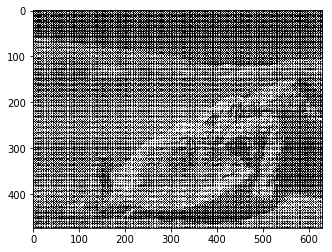

In [29]:
src = cv.imread('noisy3.tif',0)
plt.imshow(src, cmap='gray')
height = np.size(src, 0)
width = np.size(src, 1)

In [30]:
f = np.fft.fft2(src) ## Fourier Transform
fshift = np.fft.fftshift(f) ## Shifting zero frequency to center
freq_spec = 20*np.log(np.abs(fshift))  ## Take absolute and log only for displaying purpo

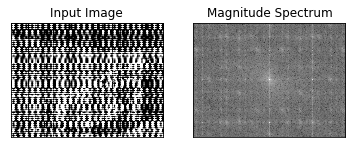

In [31]:
plt.subplot(121),plt.imshow(src, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(freq_spec, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

Text(0.5, 1.0, 'Fourier transform')

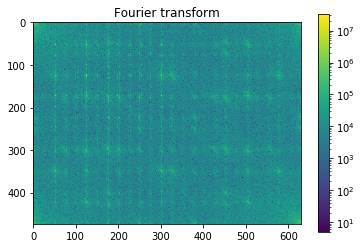

In [32]:
im_fft = fftpack.fft2(src)

# Show the results

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')

Text(0.5, 1.0, 'Filtered Spectrum')

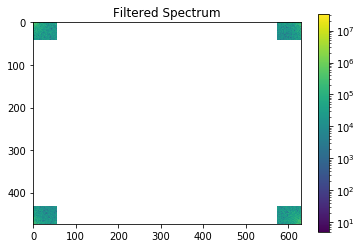

In [33]:
keep_fraction = 0.09

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2 = im_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')

Text(0.5, 1.0, 'Reconstructed Image')

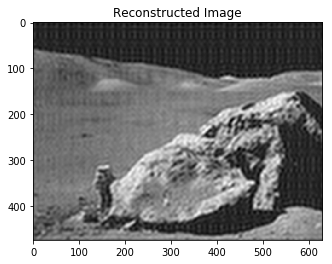

In [34]:
im_new = fftpack.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)